In [3]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
#giving value 100 number of images will be proccessed as batch_size is 100

In [4]:
batch_size = 100

img_height = 250
img_width = 250

In [ ]:
#getting the images

In [8]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Kaggle\data\train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Kaggle\data\test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Kaggle\data\val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
#Process the images by autotune

In [9]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Creating model

In [10]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

9406464/9406464 [==============================] - 3s 0us/step


In [11]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Applying model in varible history

In [13]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 28s 3s/step - loss: 1.0115 - accuracy: 0.5537 - val_loss: 0.6137 - val_accuracy: 0.6939
Epoch 2/50
8/8 [==============================] - 26s 3s/step - loss: 0.6063 - accuracy: 0.6498 - val_loss: 0.5559 - val_accuracy: 0.7959
Epoch 3/50
8/8 [==============================] - 25s 3s/step - loss: 0.4486 - accuracy: 0.8293 - val_loss: 0.4799 - val_accuracy: 0.7857
Epoch 4/50
8/8 [==============================] - 29s 4s/step - loss: 0.2967 - accuracy: 0.9052 - val_loss: 0.3916 - val_accuracy: 0.8265
Epoch 5/50
8/8 [==============================] - 60s 8s/step - loss: 0.1742 - accuracy: 0.9520 - val_loss: 0.2639 - val_accuracy: 0.8673
Epoch 6/50
8/8 [==============================] - 58s 7s/step - loss: 0.0951 - accuracy: 0.9671 - val_loss: 0.2211 - val_accuracy: 0.8776
Epoch 7/50
8/8 [==============================] - 40s 5s/step - loss: 0.0686 - accuracy: 0.9722 - val_loss: 0.2910 - val_accuracy: 0.8776
Epoch 8/50
8/8 [==================

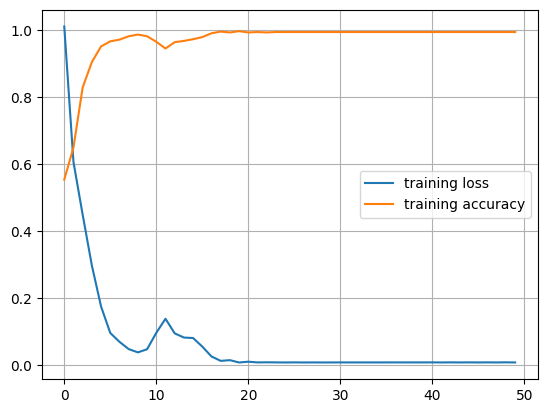

In [14]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

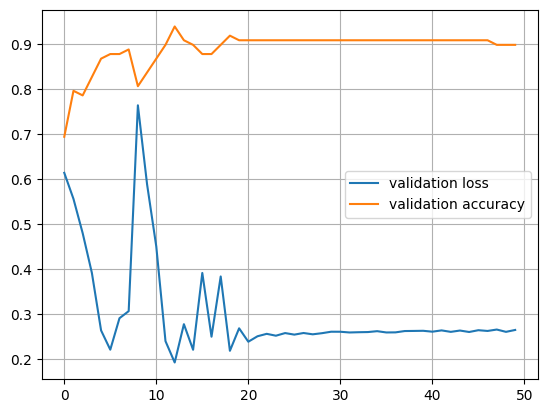

In [19]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()
